### Regresión Polinómica
La regresión polinómica es una extensión de la regresión lineal que permite modelar la relación entre variables dependientes e independientes como un polinomio de grado n.
Esta técnica es especialmente útil cuando los datos presentan una relación no lineal, que un modelo lineal simple no puede capturar correctamente.

La ecuación general del modelo puede expresarse como:

$$y = B_0 + B_1x + B_2x^2 + \dots + B_nx^n + \varepsilon $$

Donde:

- \( y \) es la **variable dependiente**.  
- \( x \) es la **variable independiente**.  
- \(  B0 + B1x + B2x^2) son los **coeficientes del modelo**.  
- \\( \varepsilon \\) representa el **término de error**.

¿Por qué usar regresión polinómica?

Relaciones no lineales: Captura mejor patrones curvos en los datos.

 Flexibilidad: Permite ajustar curvas más complejas.

Mejor ajuste: Tiende a mejorar el rendimiento sobre la regresión lineal simple cuando existe no linealidad.

## Pasos del proceso

Importar librerías

Cargar el conjunto de datos

Dividir los datos en entrenamiento y prueba

Generar características polinómicas

Entrenar el modelo

Realizar predicciones

Evaluar el modelo

In [3]:
# Paso 1: Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



Explicación:

numpy: manejo de arreglos y cálculos numéricos.

matplotlib: visualización de gráficos.

load_boston: dataset de viviendas de Boston.

train_test_split: divide el dataset.

PolynomialFeatures: genera características polinómicas.

LinearRegression: modelo de regresión.

mean_squared_error, r2_score: métricas para evaluar el rendimiento.

In [4]:
# Cargar el conjunto de datos de viviendas de Boston
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



El 80% de los datos se usan para entrenar y el 20% para probar el modelo.
random_state=42 asegura que los resultados sean reproducibles.

In [5]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


Crea nuevas columnas elevando las variables al cuadrado (grado=2).

Aumenta la capacidad del modelo para capturar relaciones no lineales.

In [6]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

Aquí se entrena el modelo con las variables transformadas.
Aunque se llama LinearRegression, el modelo ahora ajusta una curva polinómica gracias a las nuevas características.

In [7]:
y_pred = model.predict(X_test_poly)


Predice los valores de y (por ejemplo, precios de vivienda) en el conjunto de prueba.

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.4643015261571134
R^2 Score: 0.6456819711504156


MSE (Error Cuadrático Medio): mide el promedio de los errores al cuadrado; mientras más bajo, mejor.

R² (Coeficiente de determinación): mide qué tan bien explica el modelo la variabilidad de los datos (1.0 es perfecto).

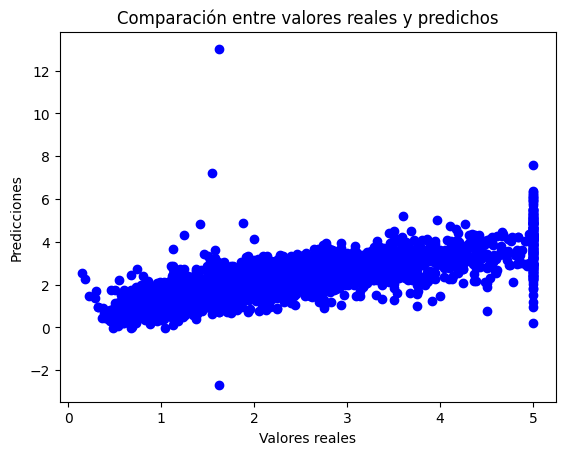

In [9]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre valores reales y predichos")
plt.show()


##Conclusión

La regresión polinómica es una herramienta poderosa para modelar relaciones no lineales entre variables.
Transforma las variables originales en características polinómicas, lo que permite que un modelo lineal capture curvas y patrones complejos.